In [2]:
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    MaxPool2D,
    Concatenate,
    AvgPool2D,
    Dropout,
    Flatten,
    Dense
)
from tensorflow.keras import Model

In [3]:
def inception_block(x, filters):
    
    
    # branch 1
    branch1 = Conv2D(filters=filters[0], kernel_size=(1, 1), padding='same', activation='relu')(x)
    
    
    # branch 2
    branch2 = Conv2D(filters=filters[1], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch2 = Conv2D(filters=filters[2], kernel_size=(3, 3), padding='same', activation='relu')(branch2)
    
    # branch 3
    branch3 = Conv2D(filters=filters[3], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch3 = Conv2D(filters=filters[4], kernel_size=(5, 5), padding='same', activation='relu')(branch3)
    
    # branch 4
    branch4 = MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch4 = Conv2D(filters=filters[5], kernel_size=(1, 1), padding='same', activation='relu')(branch4)
    
    
    
    # concatenate all branches
    output = Concatenate()([branch1, branch2, branch3, branch4])
    return output

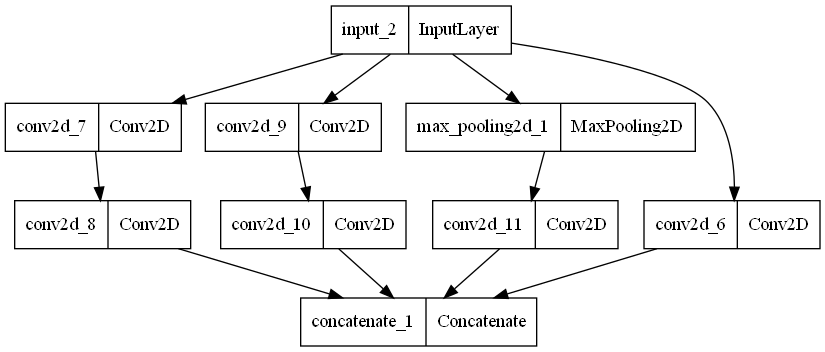

In [5]:
input = Input([224, 224, 3])
output = inception_block(input, filters=[1, 1, 1, 1, 1, 1])

from tensorflow.keras import Model
model = Model(input, output)

from tensorflow.keras.utils import plot_model
plot_model(model)

In [6]:
# Define the input layer with shape 224x224x3 (RGB image)
input_tensor = Input(shape=(224, 224, 3))

In [7]:
# Initial convolution and pooling layers
x = Conv2D(filters=64, kernel_size=(7, 7), strides=2, padding='same', activation='relu')(input_tensor)
x = MaxPool2D(pool_size=(3, 3), strides=2, padding='same')(x)

In [8]:
# Additional convolution layers
x = Conv2D(filters=64, kernel_size=(1, 1), activation='relu')(x)
x = Conv2D(filters=192, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=(3, 3), strides=2)(x)

In [9]:
# Inception blocks and pooling layers (first set)
x = inception_block(x, filters=[64, 96, 128, 16, 32, 32])
x = inception_block(x, filters=[128, 128, 192, 32, 96, 64])
x = MaxPool2D(pool_size=(3, 3), strides=2, padding='same')(x)

In [10]:
# Inception blocks (second set)
x = inception_block(x, filters=[192, 96, 208, 16, 48, 64])
x = inception_block(x, filters=[160, 112, 224, 24, 64, 64])
x = inception_block(x, filters=[128, 128, 256, 24, 64, 64])
x = inception_block(x, filters=[112, 144, 288, 32, 64, 64])
x = inception_block(x, filters=[256, 160, 320, 32, 128, 128])
x = MaxPool2D(pool_size=(3, 3), strides=2, padding='same')(x)

In [11]:
# Inception blocks (third set)
x = inception_block(x, filters=[256, 160, 320, 32, 128, 128])
x = inception_block(x, filters=[384, 192, 384, 48, 128, 128])

In [12]:
# Final layers: Average pooling, dropout, flatten, and fully connected output layer
x = AvgPool2D(pool_size=(7, 7), strides=1)(x)
x = Dropout(rate=0.4)(x)
x = Flatten()(x)
output_tensor = Dense(units=1000, activation='softmax')(x)

In [13]:
# Create the model
model = Model(inputs=input_tensor, outputs=output_tensor)

In [14]:
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_12 (Conv2D)             (None, 112, 112, 64  9472        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 56, 56, 64)  0           ['conv2d_12[0][0]']              
                                                                                            

In [15]:
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    MaxPool2D,
    Concatenate,
    AvgPool2D,
    Dropout,
    Flatten,
    Dense
)
from tensorflow.keras import Model


def inception_block(x, filters):
    """
    Inception block that applies a series of convolution and pooling operations,
    then concatenates the outputs along the channel axis.
    
    Parameters:
        x (tensor): Input tensor.
        filters (list of int): List containing the number of filters for each convolution layer.
            Expected format: [f1, f2, f3, f4, f5, f6], where:
            - f1: filters for the 1x1 conv in the first branch.
            - f2: filters for the 1x1 conv preceding the 3x3 conv in the second branch.
            - f3: filters for the 3x3 conv in the second branch.
            - f4: filters for the 1x1 conv preceding the 5x5 conv in the third branch.
            - f5: filters for the 5x5 conv in the third branch.
            - f6: filters for the 1x1 conv after the max pooling in the fourth branch.
    
    Returns:
        tensor: Concatenated output tensor from all branches.
    """

    # Branch 1: 1x1 Convolution
    branch1 = Conv2D(filters=filters[0], kernel_size=(1, 1), activation='relu')(x)

    # Branch 2: 1x1 Convolution followed by a 3x3 Convolution
    branch2 = Conv2D(filters=filters[1], kernel_size=(1, 1), activation='relu')(x)
    branch2 = Conv2D(filters=filters[2], kernel_size=(3, 3), padding='same', activation='relu')(branch2)

    # Branch 3: 1x1 Convolution followed by a 5x5 Convolution
    branch3 = Conv2D(filters=filters[3], kernel_size=(1, 1), activation='relu')(x)
    branch3 = Conv2D(filters=filters[4], kernel_size=(5, 5), padding='same', activation='relu')(branch3)

    # Branch 4: 3x3 MaxPooling followed by a 1x1 Convolution
    branch4 = MaxPool2D(pool_size=(3, 3), strides=1, padding='same')(x)
    branch4 = Conv2D(filters=filters[5], kernel_size=(1, 1), activation='relu')(branch4)

    # Concatenating filters, returns the output tensor.
    output = Concatenate()([branch1, branch2, branch3, branch4])
    return output


# Define the input layer with shape 224x224x3 (RGB image)
input_tensor = Input(shape=(224, 224, 3))

# Initial convolution and pooling layers
x = Conv2D(filters=64, kernel_size=(7, 7), strides=2, padding='same', activation='relu')(input_tensor)
x = MaxPool2D(pool_size=(3, 3), strides=2, padding='same')(x)

# Additional convolution layers
x = Conv2D(filters=64, kernel_size=(1, 1), activation='relu')(x)
x = Conv2D(filters=192, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=(3, 3), strides=2)(x)

# Inception blocks and pooling layers (first set)
x = inception_block(x, filters=[64, 96, 128, 16, 32, 32])
x = inception_block(x, filters=[128, 128, 192, 32, 96, 64])
x = MaxPool2D(pool_size=(3, 3), strides=2, padding='same')(x)

# Inception blocks (second set)
x = inception_block(x, filters=[192, 96, 208, 16, 48, 64])
x = inception_block(x, filters=[160, 112, 224, 24, 64, 64])
x = inception_block(x, filters=[128, 128, 256, 24, 64, 64])
x = inception_block(x, filters=[112, 144, 288, 32, 64, 64])
x = inception_block(x, filters=[256, 160, 320, 32, 128, 128])
x = MaxPool2D(pool_size=(3, 3), strides=2, padding='same')(x)

# Inception blocks (third set)
x = inception_block(x, filters=[256, 160, 320, 32, 128, 128])
x = inception_block(x, filters=[384, 192, 384, 48, 128, 128])

# Final layers: Average pooling, dropout, flatten, and fully connected output layer
x = AvgPool2D(pool_size=(7, 7), strides=1)(x)
x = Dropout(rate=0.4)(x)
x = Flatten()(x)
output_tensor = Dense(units=1000, activation='softmax')(x)

# Create the model
model = Model(inputs=input_tensor, outputs=output_tensor)
